# Mixture Density Network for Anomaly Detection

Classification: probability of y
Regression: Continuous value

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
torch.manual_seed(2019)
np.random.seed(2019)

In [3]:
def generate_data(n_samples):
    epsilon = np.random.normal(size=(n_samples))
    x_data = np.random.uniform(-10.5, 10.5, n_samples)
    y_data = 7 * np.sin(0.75 * x_data) + 0.5 * x_data + epsilon
    return x_data, y_data

- 1개의 mode를 갖는 정규분포에서 Regression

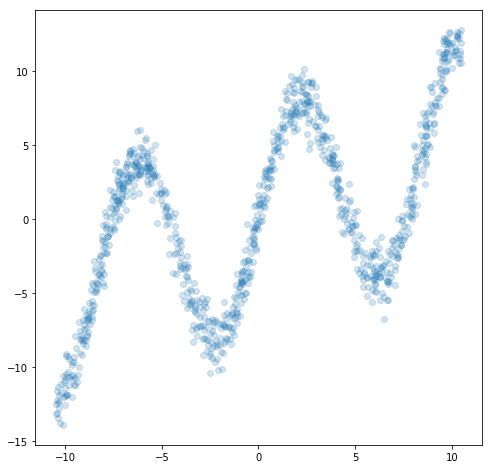

In [4]:
n_samples = 1000
x_data, y_data = generate_data(n_samples)

plt.figure(figsize=(8,8))
plt.scatter(x_data, y_data, alpha=0.2)
plt.show()

In [5]:
n_input = 1
n_hidden = 20
n_output = 1

network = nn.Sequential(nn.Linear(n_input, n_hidden),
                       nn.Tanh(),
                       nn.Linear(n_hidden, n_output))
optimizer = torch.optim.Adam(network.parameters())
loss_fn = nn.MSELoss()

x_tensor = torch.from_numpy(np.float32(x_data).reshape(n_samples, n_input))
y_tensor = torch.from_numpy(np.float32(y_data).reshape(n_samples, n_input))

In [6]:
def train():
    for epoch in range(10000):
        y_pred = network(x_tensor)
        loss = loss_fn(y_pred, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 300 == 0:
            print(loss.data)
            print(epoch, loss.item())

In [7]:
train()

tensor(38.9678)
0 38.9677848815918
tensor(24.7821)
300 24.78211784362793
tensor(23.8234)
600 23.823354721069336
tensor(23.3674)
900 23.36741828918457
tensor(22.7450)
1200 22.745031356811523
tensor(21.5992)
1500 21.599172592163086
tensor(19.8125)
1800 19.812517166137695
tensor(17.5674)
2100 17.567367553710938
tensor(14.9699)
2400 14.969904899597168
tensor(12.3323)
2700 12.332298278808594
tensor(9.9279)
3000 9.927919387817383
tensor(7.9196)
3300 7.919630527496338
tensor(6.3312)
3600 6.331236839294434
tensor(5.1183)
3900 5.118256568908691
tensor(4.2137)
4200 4.213657379150391
tensor(3.5466)
4500 3.5466103553771973
tensor(3.0526)
4800 3.0526373386383057
tensor(2.6772)
5100 2.677201509475708
tensor(2.3751)
5400 2.37506365776062
tensor(2.1249)
5700 2.1248791217803955
tensor(1.9146)
6000 1.9146126508712769
tensor(1.7375)
6300 1.7375102043151855
tensor(1.5895)
6600 1.5895098447799683
tensor(1.4674)
6900 1.4673616886138916
tensor(1.3681)
7200 1.3681257963180542
tensor(1.2891)
7500 1.28905463218

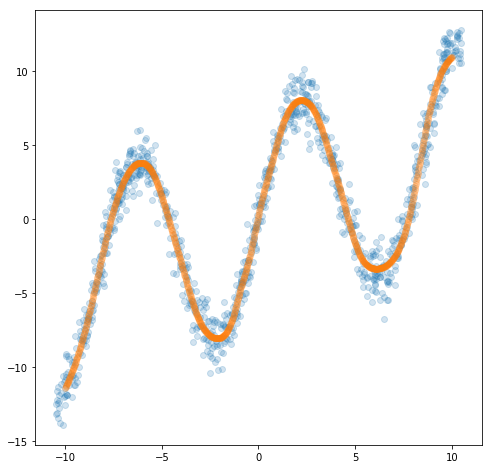

In [8]:
x_test_data = np.linspace(-10, 10, n_samples)

x_test_tensor = torch.from_numpy(np.float32(x_test_data).reshape(n_samples, n_input))
y_test_tensor = network(x_test_tensor)

y_test_data = y_test_tensor.data.numpy()

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.2)
plt.scatter(x_test_data, y_test_data, alpha=0.2)
plt.show()

확인: MLP를 통해 (1개의 hidden layer를 통해서도) 임의의 연속함수를 근사할 수 있다. (Universal Approximation Theorem)

- Multiple Output Values: 여러 개의 mode로 표현되는 정규분포에서 Regression (Multimodal Regression)

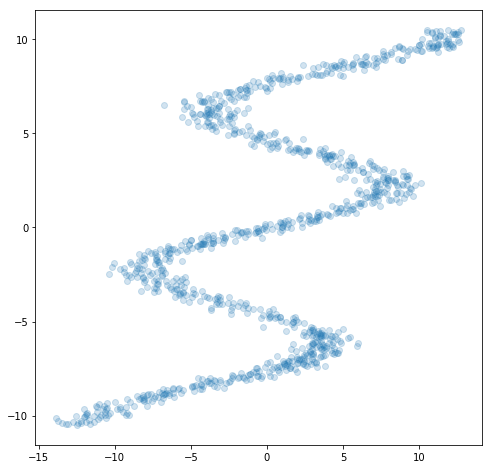

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(y_data, x_data, alpha=0.2)
plt.show()

tensor(37.2135)
0 37.21348190307617
tensor(28.8674)
300 28.86741828918457
tensor(25.5459)
600 25.545940399169922
tensor(23.7671)
900 23.767147064208984
tensor(23.0474)
1200 23.04737663269043
tensor(22.7875)
1500 22.78750991821289
tensor(22.6508)
1800 22.650794982910156
tensor(22.5131)
2100 22.51313591003418
tensor(22.4177)
2400 22.417705535888672
tensor(22.3445)
2700 22.34453773498535
tensor(22.2845)
3000 22.284481048583984
tensor(22.2388)
3300 22.238794326782227
tensor(22.2044)
3600 22.204370498657227
tensor(22.1786)
3900 22.17862319946289
tensor(22.1570)
4200 22.156991958618164
tensor(22.1400)
4500 22.140012741088867
tensor(22.1271)
4800 22.127119064331055
tensor(22.1170)
5100 22.117027282714844
tensor(22.1081)
5400 22.108108520507812
tensor(22.0979)
5700 22.0978946685791
tensor(22.0860)
6000 22.086034774780273
tensor(22.0738)
6300 22.073822021484375
tensor(22.0607)
6600 22.060653686523438
tensor(22.0453)
6900 22.045259475708008
tensor(22.0282)
7200 22.028181076049805
tensor(22.0070)

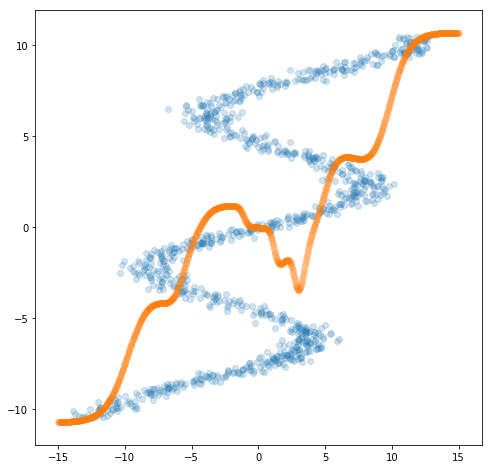

In [10]:
# try with previous network(model)

temp = x_tensor
x_tensor = y_tensor
y_tensor = temp

network = nn.Sequential(nn.Linear(n_input, n_hidden),
                       nn.Tanh(),
                       nn.Linear(n_hidden, n_output))
optimizer = torch.optim.Adam(network.parameters())
loss_fn = nn.MSELoss()

train()

x_test_data = np.linspace(-15, 15, n_samples)

x_test_tensor = torch.from_numpy(np.float32(x_test_data).reshape(n_samples, n_input))

y_test_tensor = network(x_test_tensor)

y_test_data = y_test_tensor.data.numpy()

plt.figure(figsize=(8,8))
plt.scatter(y_data, x_data, alpha=0.2)
plt.scatter(x_test_data, y_test_data, alpha=0.2)

MLP로는 multimodal regression이 안된다.

https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

RNN에서 MDN을 적용해서 Anomaly Detection for Time Series 설명할 수 있을듯